In [ ]:
'''
Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")
'''
import numpy as np
import pandas as pd

In [8]:
from google.colab import files
upload=files.upload()

Saving bank-full1.csv to bank-full1.csv


In [9]:
bankdata=pd.read_csv("bank-full1.csv")
bankdata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [11]:
#To check number of missing values?
bankdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [12]:
#encoding of categorial data
data1=pd.get_dummies(bankdata,columns=['job','marital','education','contact','month','poutcome'])
data1


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [13]:
# Custom Binary Encoding of Binary o/p variables 
data1['default'] = np.where(data1['default'].str.contains("yes"), 1, 0)
data1['housing'] = np.where(data1['housing'].str.contains("yes"), 1, 0)
data1['loan'] = np.where(data1['loan'].str.contains("yes"), 1, 0)
data1['y'] = np.where(data1['y'].str.contains("yes"), 1, 0)
data1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,1,0,0,0,0,0,1


In [14]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [15]:
#model buidling
# Dividing our data into input and output variables 
x=data1.loc[:, data1.columns != 'y']
y=data1["y"]


In [19]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x,y)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
var=list(data1.columns)
var.remove('y')
Coef_df= pd.DataFrame({'Variables': var,
                         'Beta Coefficients': pd.Series(classifier.coef_[0])})
Coef_df

,Variables,Beta Coefficients
0,age,-0.019110
1,default,-0.020812
2,balance,0.000021
3,housing,-0.761108
4,loan,-0.219088
5,day,-0.003879
6,duration,0.003823
7,campaign,-0.436494
8,pdays,0.002376
9,previous,-0.127033


In [32]:
#efficiency of model
classifier.score(x,y) 

0.8920837849195992

In [33]:
#Predictions for X dataset
y_pred = classifier.predict(x)

In [34]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,y_pred)
print(cm)

#Left diagonal talks about correct predictions by model
#Right diagonal talks about incorrectly classified observations or errors.
#The lesser the values in the right diagonal, the better is your model.

[[39172   750]
 [ 4129  1160]]


0.6002682447638086


Text(0, 0.5, 'True Positive Rate / Sensitivity')

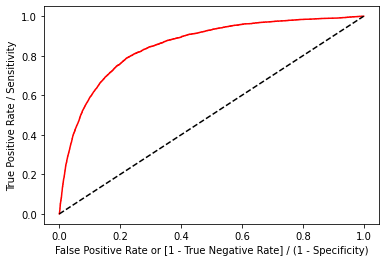

In [35]:
#ROC = Receiver Operating Curve
#AUC = Area Under Curve
#The greater the area under the curve, the better the model.
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, classifier.predict_proba(x)[:,1])

auc = roc_auc_score(y, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')

In [36]:
auc

0.6002682447638086